## Calculate dielectric tensor
Projections to PAO are performed.  
Band energies and dipole matrix elements are then computed from real-space Hamiltonian (can be interpolated for better results).  
Full k-point grid is NOT required.  
For insulators, use smearing=None only. For metals, use smearing='gauss' or 'm-p'.  
Adaptive smearing can be applied to metals.  

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../src') 
from PAOFLOW import PAOFLOW

## Si

In [ ]:
paoflow = PAOFLOW(savedir='./Si/silicon.save', model=None, outputdir='./Si/output/', 
                          smearing=None, verbose=True)
data_controller = paoflow.data_controller
arry, attr = data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

Monkhorst and Pack grid: 12 12 12 0 0 0
Insulator: True
Magnetic: False
Number of kpoints: 72
Number of electrons: 8.000000
Number of bands: 18
SciPy wi

In [3]:
arry['configuration'] = {'Si':['3S','3P','3D','4S','4P','4D']}
attr['basispath'] = '../BASIS-LARGE/'
paoflow.projections(internal=True)

atom: Si  AEWFC: ../BASIS-LARGE/Si\3S.dat        tau: [0. 0. 0.]
atom: Si  AEWFC: ../BASIS-LARGE/Si\3P.dat        tau: [0. 0. 0.]
atom: Si  AEWFC: ../BASIS-LARGE/Si\3D.dat        tau: [0. 0. 0.]
atom: Si  AEWFC: ../BASIS-LARGE/Si\4S.dat        tau: [0. 0. 0.]
atom: Si  AEWFC: ../BASIS-LARGE/Si\4P.dat        tau: [0. 0. 0.]
atom: Si  AEWFC: ../BASIS-LARGE/Si\4D.dat        tau: [0. 0. 0.]
      atwfc:   1  3S  l=0, m=1
      atwfc:   2  3P  l=1, m=1
      atwfc:   3  3P  l=1, m=2
      atwfc:   4  3P  l=1, m=3
      atwfc:   5  3D  l=2, m=1
      atwfc:   6  3D  l=2, m=2
      atwfc:   7  3D  l=2, m=3
      atwfc:   8  3D  l=2, m=4
      atwfc:   9  3D  l=2, m=5
      atwfc:  10  4S  l=0, m=1
      atwfc:  11  4P  l=1, m=1
      atwfc:  12  4P  l=1, m=2
      atwfc:  13  4P  l=1, m=3
      atwfc:  14  4D  l=2, m=1
      atwfc:  15  4D  l=2, m=2
      atwfc:  16  4D  l=2, m=3
      atwfc:  17  4D  l=2, m=4
      atwfc:  18  4D  l=2, m=5
atom: Si  AEWFC: ../BASIS-LARGE/Si\3S.dat        tau

In [4]:
paoflow.projectability()
paoflow.pao_hamiltonian()
paoflow.pao_eigh()
paoflow.gradient_and_momenta()

Projectability vector  [0.99630872 0.99437145 0.99138486 0.98977083 0.99095024 0.98870998
 0.98489412 0.98156586 0.98315037 0.98735815 0.97502017 0.972658
 0.97548279 0.97217273 0.91448867 0.94429906 0.93517956 0.88123419]
# of bands with good projectability > 0.95 = 14
Range of suggested shift  14.437849606396357  ,  18.119060993726002
Projectability in:                          0.007 sec
Building Hks in:                            0.359 sec
k -> R in:                                  0.069 sec
Eigenvalues in:                             0.227 sec
Gradient in:                                0.360 sec
Momenta in:                                 0.372 sec


In [5]:
paoflow.dielectric_tensor(delta=0.1,emax=8.,ne=801,d_tensor=[[0,0]])

No smearing, fixed occupation
Component xx , plasmon frequency =  14.477329032086976 eV
Integration over JDOS =  0.04538122153369359
Dielectric Tensor in:                       6.219 sec


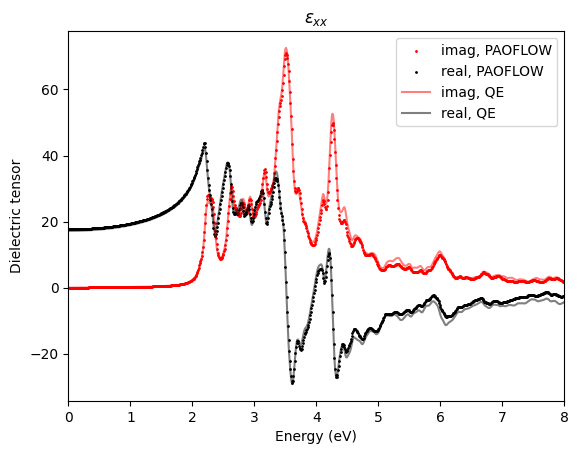

In [ ]:
epsi = np.loadtxt('./Si/output/epsi_xx_0.dat')
epsr = np.loadtxt('./Si/output/epsr_xx_0.dat')
epsqe = np.loadtxt('./Si/qe_output/epsxx.dat')
plt.scatter(epsi[:,0],epsi[:,1],color='red',s=1,label="imag, PAOFLOW")
plt.scatter(epsr[:,0],epsr[:,1],color='black',s=1,label="real, PAOFLOW")
plt.plot(epsqe[:,0],epsqe[:,2],color='red',alpha=0.5,label="imag, QE")
plt.plot(epsqe[:,0],epsqe[:,1],color='black',alpha=0.5,label="real, QE")
plt.xlim([0,8])
plt.title("$\epsilon_{xx}$")
plt.xlabel("Energy (eV)")
plt.ylabel("Dielectric tensor")
plt.legend()
plt.show()

## Al

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../src')
from PAOFLOW import PAOFLOW

In [2]:
paoflow = PAOFLOW(savedir='./Al/al_k12_gauss.save', model=None, outputdir='./Al/output_k12/', 
                          smearing='gauss', verbose=True)
data_controller = paoflow.data_controller
arry, attr = data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

Monkhorst and Pack grid: 12 12 12 0 0 0
Insulator: False
Magnetic: False
Number of kpoints: 72
Number of electrons: 3.000000
Number of bands: 20
SciPy w

In [3]:
arry['configuration'] = {'Al':['3S','3P','3D','4S','4P','4D']}
attr['basispath'] = '../BASIS-LARGE/'
paoflow.projections(internal=True)

atom: Al  AEWFC: ../BASIS-LARGE/Al\3S.dat        tau: [0. 0. 0.]
atom: Al  AEWFC: ../BASIS-LARGE/Al\3P.dat        tau: [0. 0. 0.]
atom: Al  AEWFC: ../BASIS-LARGE/Al\3D.dat        tau: [0. 0. 0.]
atom: Al  AEWFC: ../BASIS-LARGE/Al\4S.dat        tau: [0. 0. 0.]
atom: Al  AEWFC: ../BASIS-LARGE/Al\4P.dat        tau: [0. 0. 0.]
atom: Al  AEWFC: ../BASIS-LARGE/Al\4D.dat        tau: [0. 0. 0.]
      atwfc:   1  3S  l=0, m=1
      atwfc:   2  3P  l=1, m=1
      atwfc:   3  3P  l=1, m=2
      atwfc:   4  3P  l=1, m=3
      atwfc:   5  3D  l=2, m=1
      atwfc:   6  3D  l=2, m=2
      atwfc:   7  3D  l=2, m=3
      atwfc:   8  3D  l=2, m=4
      atwfc:   9  3D  l=2, m=5
      atwfc:  10  4S  l=0, m=1
      atwfc:  11  4P  l=1, m=1
      atwfc:  12  4P  l=1, m=2
      atwfc:  13  4P  l=1, m=3
      atwfc:  14  4D  l=2, m=1
      atwfc:  15  4D  l=2, m=2
      atwfc:  16  4D  l=2, m=3
      atwfc:  17  4D  l=2, m=4
      atwfc:  18  4D  l=2, m=5
Projections in:                            32.533 se

In [4]:
paoflow.projectability()
paoflow.pao_hamiltonian()
# paoflow.interpolated_hamiltonian()  # uncomment if interpolating Hamiltonian to a finer mesh
paoflow.pao_eigh()
paoflow.gradient_and_momenta()
# paoflow.adaptive_smearing(smearing='gauss')  # uncomment if using adaptive smearing for metals

Projectability vector  [0.9969189  0.99394304 0.99263446 0.99019687 0.98046184 0.97076545
 0.93444081 0.83330759 0.82713336 0.60316047 0.38040733 0.36393231
 0.4661748  0.50173634 0.38736938 0.38758281 0.40245509 0.38843079
 0.30612122 0.2583074 ]
# of bands with good projectability > 0.95 = 6
Range of suggested shift  14.709820064622404  ,  26.385525585578527
Projectability in:                         21.900 sec
Building Hks in:                            0.275 sec
k -> R in:                                  0.017 sec
Eigenvalues in:                             0.124 sec
Gradient in:                                0.082 sec
Momenta in:                                 0.081 sec


In [5]:
paoflow.dielectric_tensor(delta=0.1,intrasmear=0.05,emax=8.,ne=801,d_tensor=[[0,0]])

Using fixed smearing = 0.272 eV
Component xx , plasmon frequency =  16.60357761361037 eV
Integration over JDOS =  0.04600380756600072
Dielectric Tensor in:                      15.786 sec


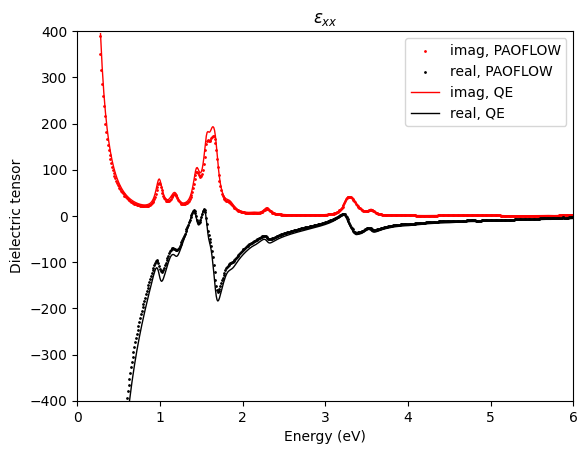

In [8]:
epsi = np.loadtxt('./Al/output_k12/epsi_xx_0.dat')
epsr = np.loadtxt('./Al/output_k12/epsr_xx_0.dat')
epsiqe = np.loadtxt('./Al/qe_output_k12_002/epsi_al.dat',skiprows=30)
epsrqe = np.loadtxt('./Al/qe_output_k12_002/epsr_al.dat',skiprows=50)
plt.scatter(epsi[:,0],epsi[:,1],color='red',s=1,label="imag, PAOFLOW")
plt.scatter(epsr[:,0],epsr[:,1],color='black',s=1,label="real, PAOFLOW")
plt.plot(epsiqe[:,0],epsiqe[:,1],color='red',label="imag, QE",linewidth=1)
plt.plot(epsrqe[:,0],epsrqe[:,1],color='black',label="real, QE",linewidth=1)
plt.xlim([0,6])
plt.ylim([-400,400])
plt.title("$\epsilon_{xx}$")
plt.xlabel("Energy (eV)")
plt.ylabel("Dielectric tensor")
plt.legend()
plt.show()

## GaAs

In [16]:
paoflow = PAOFLOW(savedir='./GaAs/gaas.save', model=None, outputdir='./GaAs/output/', 
                          smearing=None, verbose=True)
data_controller = paoflow.data_controller
arry, attr = data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

Monkhorst and Pack grid: 16 16 16 0 0 0
Insulator: True
Magnetic: False
Number of kpoints: 145
Number of electrons: 8.000000
Number of bands: 16
SciPy w

In [17]:
arry['configuration'] = {'Ga':{'3P','3D','4S','4P','4D'},
                        'As':{'3P','3D','4S','4P','4D'}}
attr['basispath'] = '../BASIS-LARGE/'
paoflow.projections(internal=True)

atom: Ga  AEWFC: ../BASIS-LARGE/Ga\3P.dat        tau: [0. 0. 0.]
atom: Ga  AEWFC: ../BASIS-LARGE/Ga\4P.dat        tau: [0. 0. 0.]
atom: Ga  AEWFC: ../BASIS-LARGE/Ga\4S.dat        tau: [0. 0. 0.]
atom: Ga  AEWFC: ../BASIS-LARGE/Ga\4D.dat        tau: [0. 0. 0.]
atom: Ga  AEWFC: ../BASIS-LARGE/Ga\3D.dat        tau: [0. 0. 0.]
      atwfc:   1  3P  l=1, m=1
      atwfc:   2  3P  l=1, m=2
      atwfc:   3  3P  l=1, m=3
      atwfc:   4  4P  l=1, m=1
      atwfc:   5  4P  l=1, m=2
      atwfc:   6  4P  l=1, m=3
      atwfc:   7  4S  l=0, m=1
      atwfc:   8  4D  l=2, m=1
      atwfc:   9  4D  l=2, m=2
      atwfc:  10  4D  l=2, m=3
      atwfc:  11  4D  l=2, m=4
      atwfc:  12  4D  l=2, m=5
      atwfc:  13  3D  l=2, m=1
      atwfc:  14  3D  l=2, m=2
      atwfc:  15  3D  l=2, m=3
      atwfc:  16  3D  l=2, m=4
      atwfc:  17  3D  l=2, m=5
atom: As  AEWFC: ../BASIS-LARGE/As\3P.dat        tau: [-2.645  2.645  2.645]
atom: As  AEWFC: ../BASIS-LARGE/As\4P.dat        tau: [-2.645  2.645  2

In [18]:
paoflow.projectability()
paoflow.pao_hamiltonian()
paoflow.pao_eigh()
paoflow.gradient_and_momenta()

Projectability vector  [0.97445974 0.98680775 0.99610079 0.99710437 0.97283933 0.98545347
 0.99234196 0.98250381 0.91542552 0.91492477 0.8574465  0.78886026
 0.78674878 0.61146992 0.45060387 0.49899734]
# of bands with good projectability > 0.95 = 8
Range of suggested shift  7.4061997448160035  ,  11.284021433827771
Projectability in:                          0.002 sec
Building Hks in:                            0.651 sec
k -> R in:                                  0.100 sec
Eigenvalues in:                             0.465 sec
Gradient in:                                0.649 sec
Momenta in:                                 1.315 sec


In [19]:
paoflow.dielectric_tensor(delta=0.125,emax=8.,ne=800,d_tensor=[[0,0]])

No smearing, fixed occupation
Component xx , plasmon frequency =  13.228014974288682 eV
Integration over JDOS =  0.0847797159859484
Dielectric Tensor in:                       1.669 sec


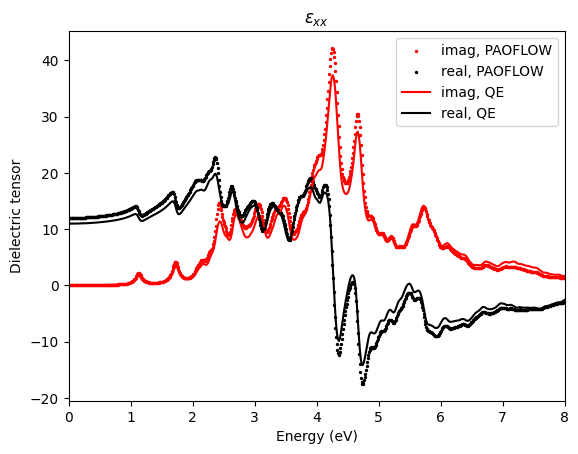

In [20]:
epsi = np.loadtxt('./GaAs/output/epsi_xx_0.dat')
epsr = np.loadtxt('./GaAs/output/epsr_xx_0.dat')
epsiqe = np.loadtxt('./GaAs/qe_output/epsi_gaas.dat')
epsrqe = np.loadtxt('./GaAs/qe_output/epsr_gaas.dat')
plt.scatter(epsi[:,0],epsi[:,1],color='red',s=2,label="imag, PAOFLOW")
plt.scatter(epsr[:,0],epsr[:,1],color='black',s=2,label="real, PAOFLOW")
plt.plot(epsiqe[:,0],epsiqe[:,1],color='red',label="imag, QE")
plt.plot(epsrqe[:,0],epsrqe[:,1],color='black',label="real, QE")
plt.xlim([0,8])
plt.title("$\epsilon_{xx}$")
plt.xlabel("Energy (eV)")
plt.ylabel("Dielectric tensor")
plt.legend()
plt.show()